# Heart Disease Prediction
In this machine learning project, I have collected the dataset from Kaggle (https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction/data) and I will be using Machine Learning to make predictions on whether a person is suffering from Heart Disease or not.

## Import libraries
- Let's first import all the necessary libraries. I'll use numpy and pandas to start with. For visualization, I will use pyplot subpackage of matplotlib, use rcParams to add styling to the plots and rainbow for colors. For implementing Machine Learning models and processing of data, I will use the sklearn library.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. Data Collection

In [2]:
import pandas as pd

data = pd.read_csv('Heart_Disease_Prediction.csv')
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

### EDA

In [5]:
print("\nSummary Statistics:")
data.describe()


Summary Statistics:


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


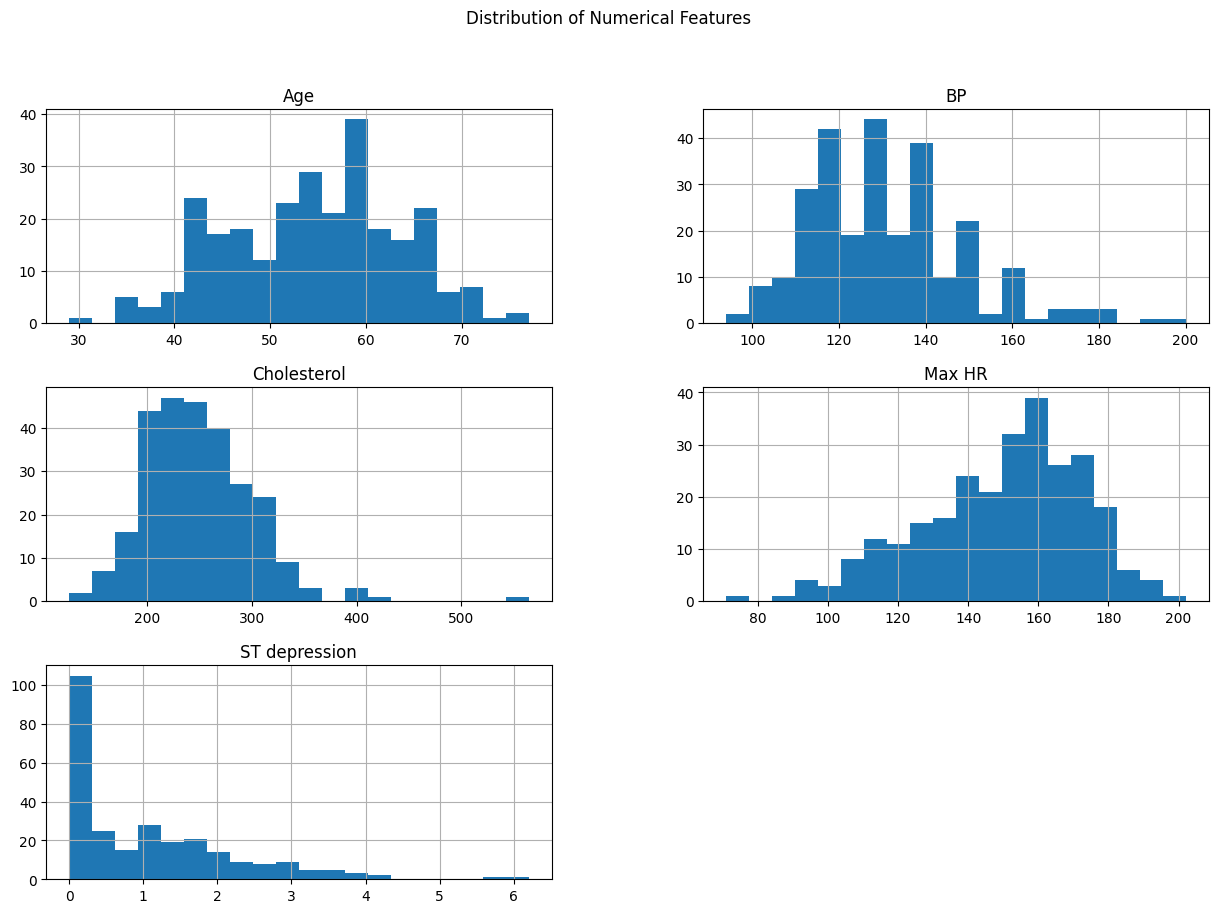

In [6]:
numerical_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']
data[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

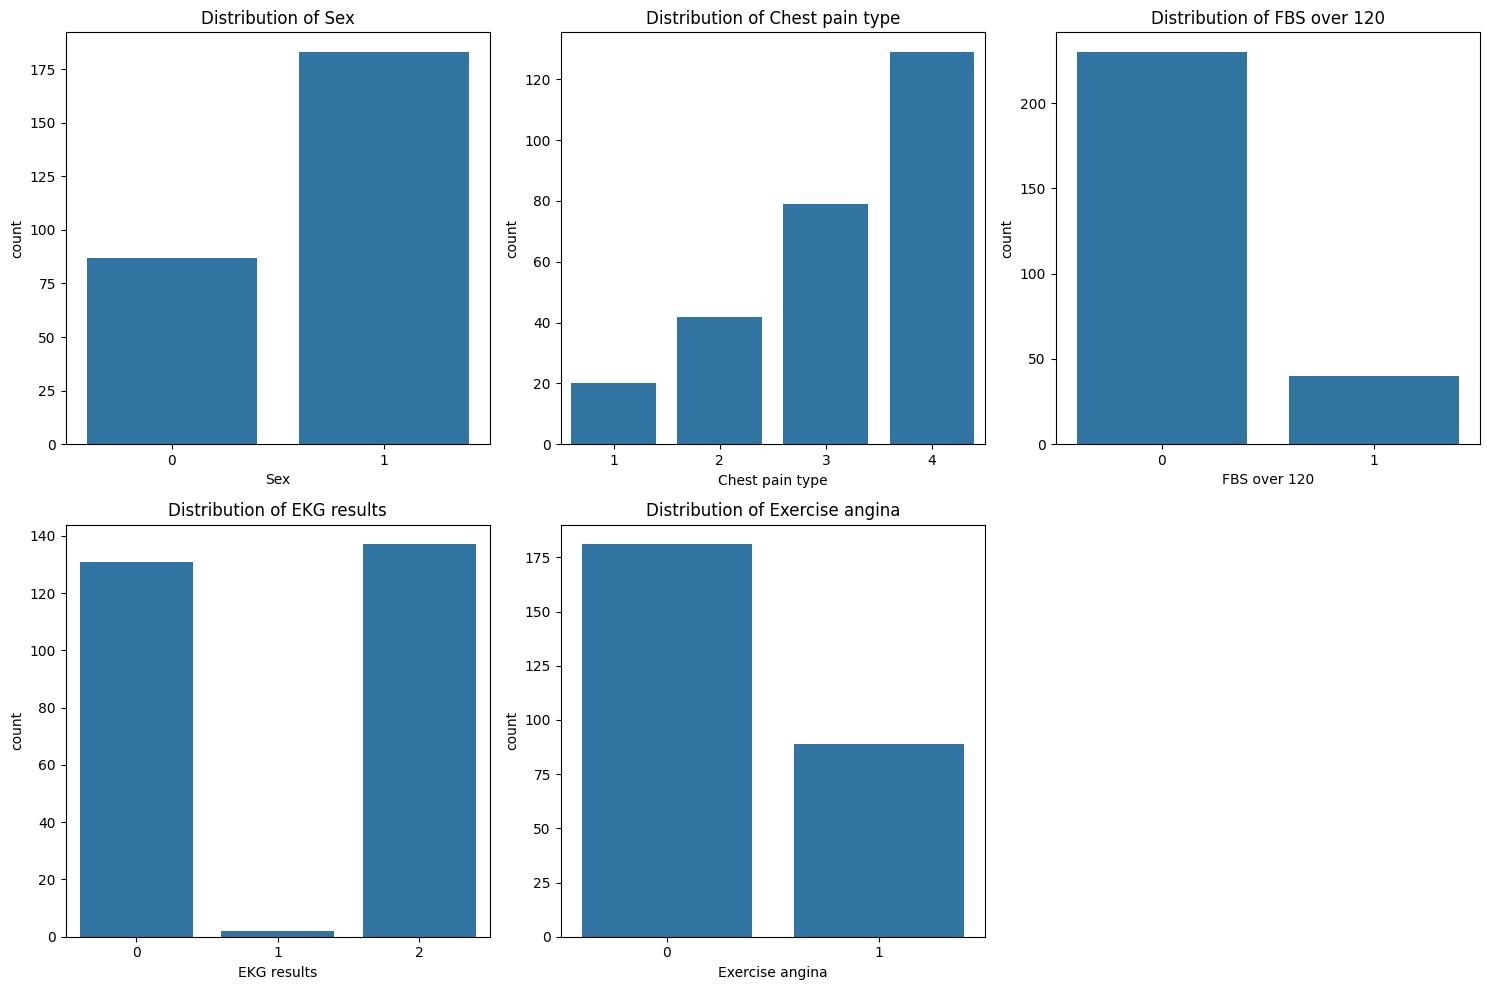

In [7]:
categorical_features = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=data, x=feature)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

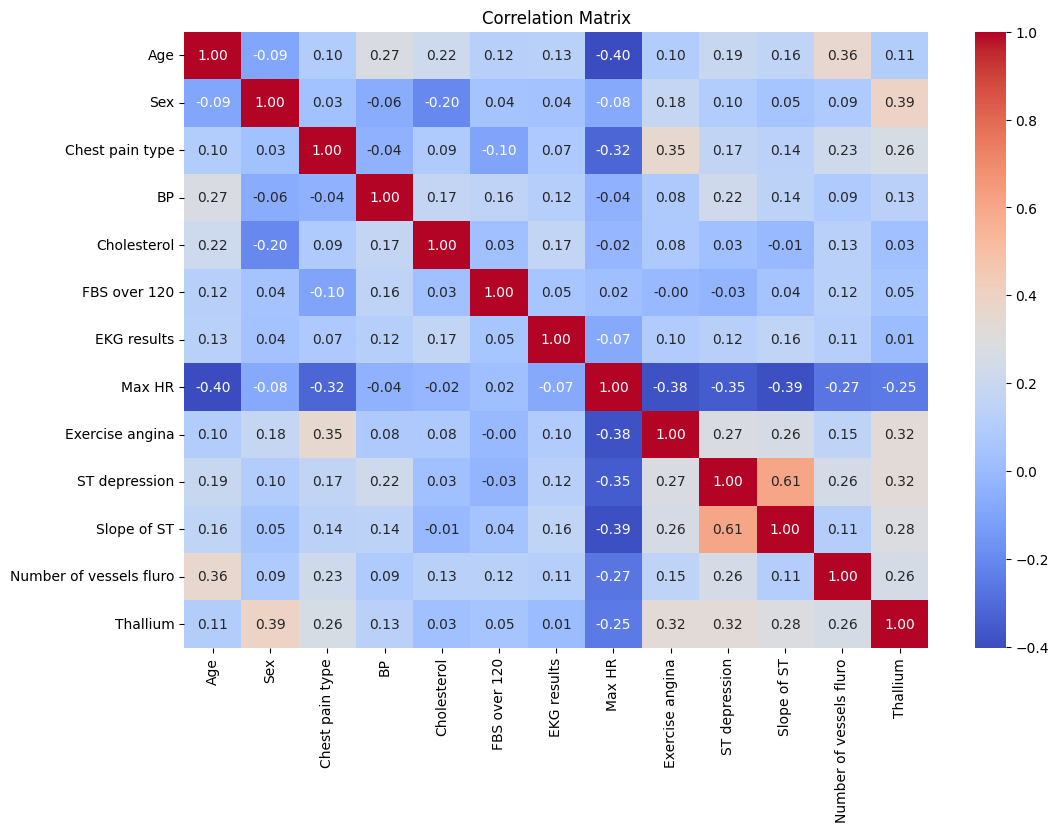

In [8]:
# Correlation matrix
numeric_data = data.select_dtypes(include=np.number)
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [9]:
# Assuming 'Presence' represents the positive class (1) and 'Absence' represents the negative class (0)
class_mapping = {'Absence': 0, 'Presence': 1}
data['Heart Disease'] = data['Heart Disease'].map(class_mapping)

### Split the dataset:

In [10]:
from sklearn.model_selection import train_test_split
selected_features = ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 
                     'EKG results', 'Max HR', 'Exercise angina', 'ST depression']

X = data[selected_features]
y = data['Heart Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.metrics import accuracy_score

### 1.Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

# Make predictions
y_pred_lr = logistic_reg.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy of Logistic Regression:", accuracy_lr)

Accuracy of Logistic Regression: 0.8333333333333334


c:\Users\Jyotiraditya Banshtu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2.K-Nearest Neighbors (KNN)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of K-Nearest Neighbors (KNN):", accuracy_knn)


Accuracy of K-Nearest Neighbors (KNN): 0.6296296296296297


### 3.Decision Trees

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred_dt = decision_tree.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Trees:", accuracy_dt)


Accuracy of Decision Trees: 0.6666666666666666


### 4.Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest:", accuracy_rf)


Accuracy of Random Forest: 0.7592592592592593


### 5.Support Vector Machines (SVM)

In [16]:
from sklearn.svm import SVC

# Initialize and train the model
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy of Support Vector Machines (SVM):", accuracy_svm)

Accuracy of Support Vector Machines (SVM): 0.6296296296296297


### 6.Gradient Boosting

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)

# Make predictions
y_pred_gb = gradient_boosting.predict(X_test)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy of Gradient Boosting:", accuracy_gb)

Accuracy of Gradient Boosting: 0.7407407407407407


### 7.AdaBoost

In [18]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize and train the model
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)

# Make predictions
y_pred_ab = adaboost.predict(X_test)

# Calculate accuracy
accuracy_ab = accuracy_score(y_test, y_pred_ab)
print("Accuracy of AdaBoost:", accuracy_ab)

Accuracy of AdaBoost: 0.7222222222222222


c:\Users\Jyotiraditya Banshtu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


### 8.Gaussian Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Make predictions
y_pred_nb = naive_bayes.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy of Gaussian Naive Bayes:", accuracy_nb)

Accuracy of Gaussian Naive Bayes: 0.8148148148148148


### 9.XGBoost

In [20]:
from xgboost import XGBClassifier
# Split data into features (X) and target (y)
X = data[selected_features]
y = data['Heart Disease']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgboost.predict(X_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy of XGBoost:", accuracy_xgb)

Accuracy of XGBoost: 0.7222222222222222


### 10.Neural Network (Multi-layer Perceptron)

In [21]:
from sklearn.neural_network import MLPClassifier

# Initialize and train the model
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp.predict(X_test)

# Calculate accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy of Neural Network (Multi-layer Perceptron):", accuracy_mlp)

Accuracy of Neural Network (Multi-layer Perceptron): 0.7592592592592593


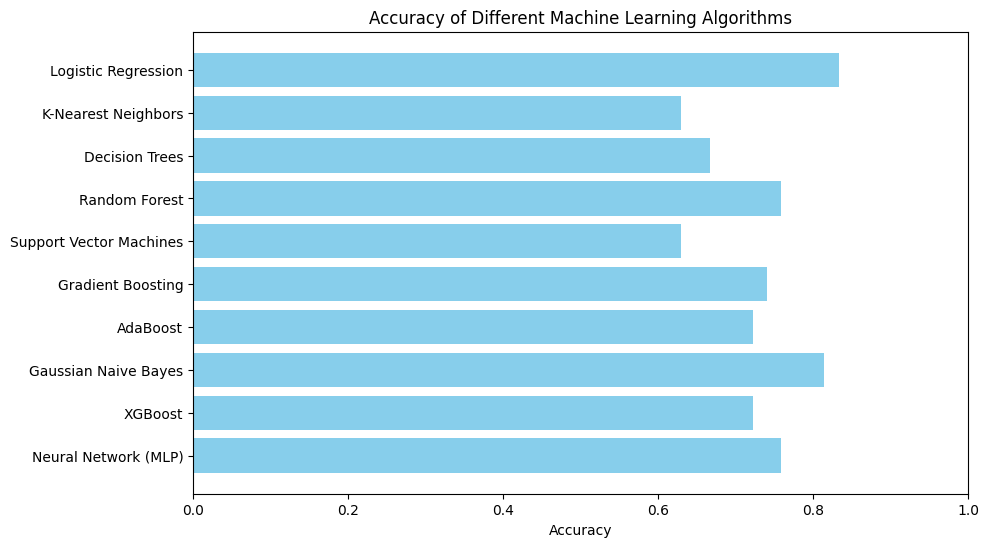

In [22]:
import matplotlib.pyplot as plt

# List of algorithm names
algo_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Trees', 'Random Forest',
              'Support Vector Machines', 'Gradient Boosting', 'AdaBoost', 'Gaussian Naive Bayes',
              'XGBoost', 'Neural Network (MLP)']

# List of accuracies corresponding to each algorithm
accuracies = [accuracy_lr, accuracy_knn, accuracy_dt, accuracy_rf,
              accuracy_svm, accuracy_gb, accuracy_ab, accuracy_nb,
              accuracy_xgb, accuracy_mlp]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.barh(algo_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.xlim(0, 1)  # Set limit from 0 to 1 for accuracy values
plt.gca().invert_yaxis()  # Invert y-axis to have the highest accuracy at the top
plt.show()


In [23]:
# List of algorithm names
algo_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Trees', 'Random Forest',
              'Support Vector Machines', 'Gradient Boosting', 'AdaBoost', 'Gaussian Naive Bayes',
              'XGBoost', 'Neural Network (MLP)']

# List of accuracies corresponding to each algorithm
accuracies = [accuracy_lr, accuracy_knn, accuracy_dt, accuracy_rf,
              accuracy_svm, accuracy_gb, accuracy_ab, accuracy_nb,
              accuracy_xgb, accuracy_mlp]

# Print the accuracies of all models
for algo_name, accuracy in zip(algo_names, accuracies):
    print(f"Accuracy of {algo_name}: {accuracy}")


Accuracy of Logistic Regression: 0.8333333333333334
Accuracy of K-Nearest Neighbors: 0.6296296296296297
Accuracy of Decision Trees: 0.6666666666666666
Accuracy of Random Forest: 0.7592592592592593
Accuracy of Support Vector Machines: 0.6296296296296297
Accuracy of Gradient Boosting: 0.7407407407407407
Accuracy of AdaBoost: 0.7222222222222222
Accuracy of Gaussian Naive Bayes: 0.8148148148148148
Accuracy of XGBoost: 0.7222222222222222
Accuracy of Neural Network (MLP): 0.7592592592592593


In [24]:
import os
import joblib

# Create a directory to save models
output_dir = 'models'
os.makedirs(output_dir, exist_ok=True)

# Define model names
model_names = ['logistic_regression', 'k_nearest_neighbors', 'decision_tree', 'random_forest',
               'support_vector_machine', 'gradient_boosting', 'adaboost', 'gaussian_naive_bayes',
               'xgboost', 'neural_network']

# Define models and corresponding filenames
models = [logistic_reg, knn, decision_tree, random_forest, svm, gradient_boosting, adaboost, naive_bayes, xgboost, mlp]
filenames = [os.path.join(output_dir, f"{name}.joblib") for name in model_names]

# Save models
for model, filename in zip(models, filenames):
    joblib.dump(model, filename)

print("All models saved successfully!")


All models saved successfully!
